<a href="https://colab.research.google.com/github/VanessaRivas2000/Tareas-Progra-III/blob/main/ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import zipfile
import io
import tensorflow as tf
import math
import tensorflow_datasets as tfds
import cv2
import numpy as np
import os 
import matplotlib.pyplot as plt

In [328]:
from google.colab import files
subir = files.upload()

Saving imagenes.zip to imagenes (2).zip


In [339]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(subir["imagenes.zip"]), 'r')
data.extractall()

In [340]:
imagenes = "/content/imagenes/leer_imagenes"
img_size = 28
datos = []
for img in os.listdir(imagenes):
  img = cv2.imread(os.path.join(imagenes, img))
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray,(img_size,img_size))
  datos.append([img_gray_resize])

print(len(datos))
print(datos)

10
[[array([[248, 255, 255, 255, 253, 255, 251, 255, 255, 249, 253, 254, 254,
        254, 241, 254, 254, 250, 254, 254, 253, 254, 243, 255, 255, 253,
        253, 255],
       [255, 250, 255, 249, 255, 248, 255, 250, 255, 241, 254, 254, 239,
        254, 254, 254, 250, 246, 254, 254, 247, 254, 255, 252, 255, 255,
        255, 255],
       [252, 249, 249, 255, 246, 252, 255, 246, 248, 255, 186,  84,  50,
         41,  63,  51,  88, 215, 254, 254, 254, 248, 244, 254, 255, 254,
        254, 255],
       [255, 255, 248, 255, 253, 255, 250, 250, 161, 144,  23,  10,   2,
         13,   3,  16,  66,  99,  66, 139, 248, 254, 253, 255, 254, 252,
        252, 254],
       [255, 246, 253, 248, 255, 172,  92,  69, 130,  36, 109,   1,   4,
         22,  95,  55,  89, 109,  58,  53,  55, 147, 255, 252, 255, 255,
        254, 253],
       [245, 253, 255, 250, 159,  73,  45, 163, 135,  82, 219,  89,  75,
        215, 130,  31, 158, 197,  62,  44,  53,  36,  80, 234, 255, 255,
        255, 255],
     

In [341]:
datos = np.array(datos)
print(datos.shape)


(10, 1, 28, 28)


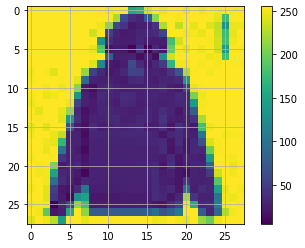

In [351]:

plt.figure()
plt.imshow(np.squeeze(datos[1]))
plt.colorbar()
plt.grid(True)
plt.show()

In [352]:
images = np.concatenate([datos])
print(len(images))
Images = np.array(images)

10


In [347]:
def normalizacion(img, label):
  img = tf.cast(img, tf.float32)
  img /= 255 #236/255 = 0.004237288
  return img, label

In [353]:
etiquetas_ropa = np.repeat(0,10)
print(len(etiquetas_ropa))
print(etiquetas_ropa)

10
[0 0 0 0 0 0 0 0 0 0]


In [354]:
nombres_ropa = ['Bolso2','botin','camisa','camiseta','pantalon','pull-over','saco','sandalia1','vestido','zapatilla']

In [355]:
nombres_ropa

['Bolso2',
 'botin',
 'camisa',
 'camiseta',
 'pantalon',
 'pull-over',
 'saco',
 'sandalia1',
 'vestido',
 'zapatilla']

In [356]:
labels = np.concatenate([etiquetas_ropa])
print(labels)
Labels = np.array(labels)
print(Labels.shape)

print(nombres_ropa)

[0 0 0 0 0 0 0 0 0 0]
(10,)
['Bolso2', 'botin', 'camisa', 'camiseta', 'pantalon', 'pull-over', 'saco', 'sandalia1', 'vestido', 'zapatilla']


In [357]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # Capa de entrada con 784 neuronas a un canal
    tf.keras.layers.Dense(64,activation=tf.nn.relu), # Capa oculta con 64 neuronas,con la funcion de activacion relu, nos devuelve valores entre 0 y 1.
    tf.keras.layers.Dense(64,activation=tf.nn.relu), # 
    tf.keras.layers.Dense(10,activation=tf.nn.softmax) #softmax(ideal para clasificaciones); la capa de salida tiene 10 neuronas
    
])

In [358]:
modelo.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
    
)

In [389]:
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255
  return imagenes, etiquetas

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


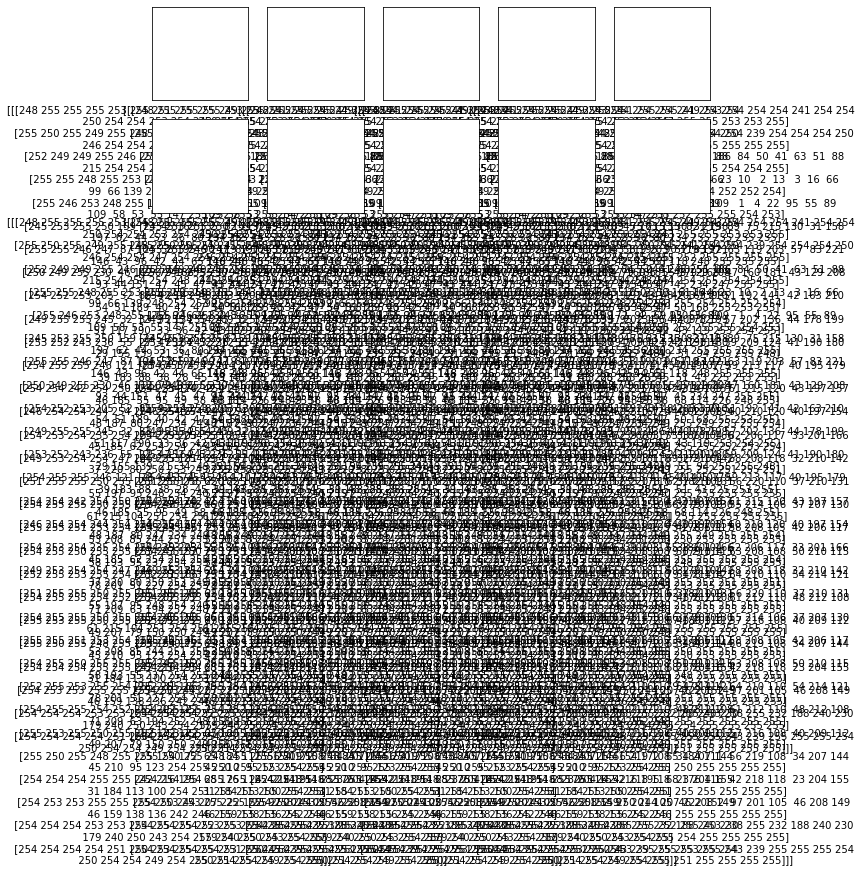

In [399]:
i = 0
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow#(images[i])
  #cmap=plt.cm.binary
  plt.xlabel(datos[labels[i]])
  plt.show